<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/T%C3%B3pico%2003%20-Aprendizado_Supervisionado_RNA_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron e RNA

Neste notebook, implementaremos o Perceptron, um modelo simples de neurônio artificial criado em 1958 por Frank Rosenblatt. Ele é capaz de classificar exemplos em duas classes e usa pesos e bias para calcular a saída final. O ajuste dos pesos e bias é dado com base nos erros de classificação em cada iteração.

O Perceptron é base para desenvolvimento de modelos mais sofisticados como o Multilayer Perceptron (MLP) e o Convolutional Neural Network (CNN). Portanto, o estudo do Perceptron é fundamental para entender as redes neurais em geral, bem como as possibilidades e limitações que elas apresentam.

É importante ressaltar que este notebook é complementar aos slides de sala de aula, os quais apresentam a teoria detalhada do Perceptron.

Também abordaremos a implementação de MLPs ao final deste notebook, analisando criticamente seu desempenho em diferentes cenários.

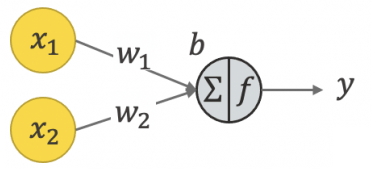

In [ ]:
import numpy as np

def activation(x):
  return np.where(x >= 0, 1, 0)

def predict(X,weights,bias):
      z = np.dot(X, weights) + bias
      return activation(z)

def fit(X, y, learning_rate=0.001, epochs=100):
      n_features = X.shape[1]

      # Inicialização dos pesos
      weights = weights = np.random.rand(n_features)
      bias = 0

      # Iteração por epocas
      for epoch in range(epochs):
          # iteração entre as amostras
          for i in range(len(X)):
              z = np.dot(X, weights) + bias # Produto escalar e bias
              y_pred = activation(z) #Função de ativação
              loss = (y[i] - y_pred[i]) #calculo da perda

              #Atualização dos pesos com base no erro
              weights = weights + learning_rate * loss * X[i]
              bias = bias + learning_rate * loss

      #Calculo de performance da epoca
      y_pred = predict(X,weights,bias)
      acc = 1 - np.sum(np.abs(y_pred-y))/len(X)
      print(f'acc after epcoch {epoch}: {acc}')
      return weights, bias

#Features e Labels
X = np.array([[0, 0, 0],
              [0, 1, 0],
              [1, 1, 0],
              [1, 1, 1]])

y = np.array([1,
              0,
              0,
              1])


w,b = fit(X, y,
          learning_rate=0.001,
          epochs=100)

#Passando a mesma base de treino para fins ilustrativos do predict
pred = predict(X,w,b)
print(pred)

acc after epcoch 99: 0.25
[0 1 1 1]


Vamos testar um perceptron para determinar quando um aluno passa por média ou reprova (1) e reprovados (0).

Neste caso hipotético, criamos um dataset que representa 3 notas de um aluno, sendo a classe 1 para aqueles que atingiram média e 0 para os reprovados



In [ ]:
#Dataset de notas
X = np.array([[7, 9, 7],
              [3, 7, 3],
              [10, 10, 10],
              [8, 5, 10],
              [4, 5, 7],
              [4, 9, 2],
              [7, 6, 8],
              [3, 5, 5]])

y = np.array([1,
              0,
              1,
              1,
              0,
              0,
              1,
              0])

w,b = fit(X, y,
          learning_rate=0.001,
          epochs=100)

acc after epcoch 99: 1.0


Testando o modelo

In [ ]:
pred = predict([10,8,9],w,b)
print(pred)

pred = predict([9,7,5],w,b)
print(pred)

pred = predict([5,9,7],w,b)
print(pred)

pred = predict([6,6,9],w,b)
print(pred)

pred = predict([4,6,6],w,b)
print(pred)

pred = predict([3,5,7],w,b)
print(pred)

pred = predict([0,10,7],w,b)
print(pred)

1
1
0
1
0
0
0


E com o dataset IRIS ?

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_iris()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y)


w,b = fit(X_train,y_train,learning_rate=0.001, epochs=100)

y_pred = predict(X_test,w,b)

print(classification_report(y_test,y_pred))







acc after epcoch 99: 0.3660714285714286
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.24      1.00      0.38         9
           2       0.00      0.00      0.00        16

    accuracy                           0.24        38
   macro avg       0.08      0.33      0.13        38
weighted avg       0.06      0.24      0.09        38



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Rede Neural - MLP

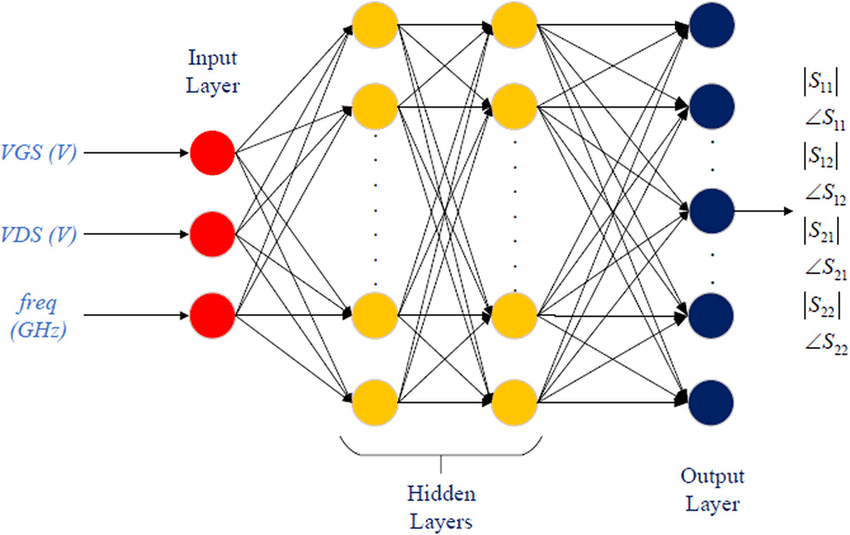

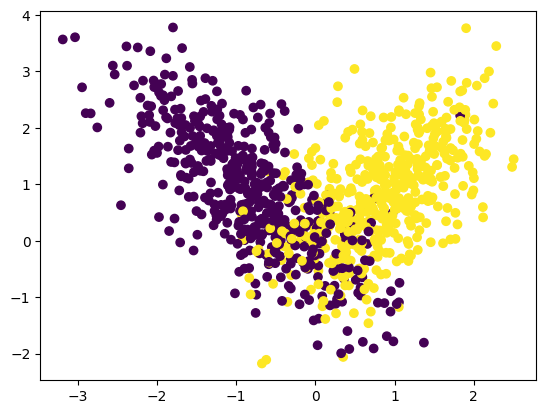

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.85      0.85      0.85        95

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



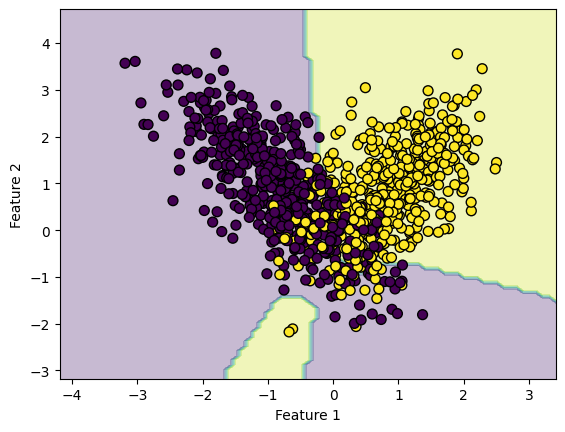

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1,
                           n_informative=2, n_redundant=0, class_sep=0.8, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=42)

mlp.fit(X_train, y_train)

pred = mlp.predict(X_test)

print(classification_report(y_test,pred))

# Cria o meshgrid
xx, yy = np.meshgrid(np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.1),
                     np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.1))


# Obtem as previsões da MLP para cada ponto do meshgrid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualiza as fronteiras de decisão
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##Avaliando o número de neurônios e camadas

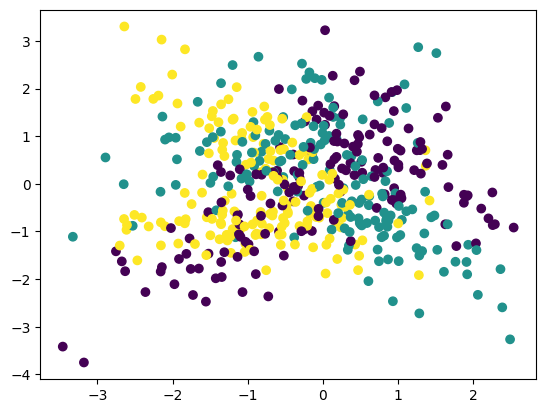

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.775
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.70      0.75      0.72        28
           2       0.88      0.88      0.88        25

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.78      0.78      0.78        80

######################################


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7625
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.70      0.68      0.69        28
           2       0.81      0.88      0.85        25

    accuracy                           0.76        80
   macro avg       0.76      0.77      0.76        80
weighted avg       0.76      0.76      0.76        80

######################################
0.8375
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.81      0.75      0.78        28
           2       0.89      0.96      0.92        25

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80

######################################
0.8125
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.75      0

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.75
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.83      0.54      0.65        28
           2       0.71      0.88      0.79        25

    accuracy                           0.75        80
   macro avg       0.76      0.76      0.74        80
weighted avg       0.76      0.75      0.74        80

######################################


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.775
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.74      0.61      0.67        28
           2       0.79      0.92      0.85        25

    accuracy                           0.78        80
   macro avg       0.77      0.78      0.77        80
weighted avg       0.77      0.78      0.77        80

######################################


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.775
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.70      0.68      0.69        28
           2       0.85      0.92      0.88        25

    accuracy                           0.78        80
   macro avg       0.77      0.78      0.78        80
weighted avg       0.77      0.78      0.77        80

######################################
0.8375
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.81      0.75      0.78        28
           2       0.89      0.96      0.92        25

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80

######################################


In [ ]:
X, y = make_classification(n_samples=500, n_features=3, n_classes=3, n_informative=3, n_redundant=0, class_sep=0.85, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#70-30 (Train-Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Sobre o treino, selecion 30% para val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Variando camadas e neuronios
clfs = []
clfs.append(MLPClassifier(hidden_layer_sizes=(10,10), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(10,10,10), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100,100), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100,100,100), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(300,300,300,300), learning_rate_init=0.001, max_iter=2000, random_state=42))

#Variando Iterações
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=100, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=200, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=500, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=42))

for i,model in enumerate(clfs):

  model.fit(X_train, y_train)
  preds = model.predict(X_val)
  print(accuracy_score(y_val,preds))
  print(classification_report(y_val,preds))
  print("######################################")

#Comparação com vários classificadores

Realize vários experimentos, considerando número de amostras, classes e features.

Analise o tempo, acuracia, etc.

Verifique qual classificador possui a melhor acurácia para cada caso.

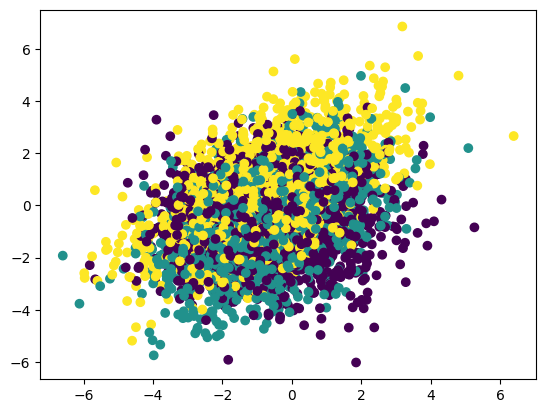

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


X, y = make_classification(n_samples=5000, n_features=10, n_classes=3, n_clusters_per_class=1,n_informative=8, n_redundant=0, class_sep=0.6, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNN()
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(C=1.0,kernel='rbf')
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), learning_rate_init=0.001, max_iter=6000, random_state=42)

for model,model_name in zip([knn,nb,dt,svm,mlp],['KNN','Naive Bayes','Decision Tree','SVM','MLP']):

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  print(model_name, accuracy_score(y_test,preds))
  print(classification_report(y_test,preds))
  print("######################################")

KNN 0.897
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       350
           1       0.89      0.83      0.86       315
           2       0.87      0.90      0.88       335

    accuracy                           0.90      1000
   macro avg       0.90      0.89      0.90      1000
weighted avg       0.90      0.90      0.90      1000

######################################
Naive Bayes 0.737
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       350
           1       0.70      0.70      0.70       315
           2       0.71      0.79      0.75       335

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000

######################################
Decision Tree 0.78
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       350
    